<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Final_Project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display 1st few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Distribution of classes
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


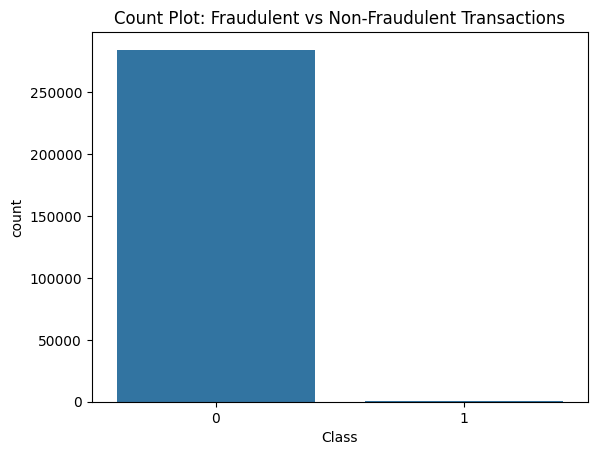

In [5]:
# % distribution of the classes
print(df['Class'].value_counts(normalize=True) * 100)
# Graphical representation of the count of the classes
sns.countplot(x='Class', data=df)
plt.title("Count Plot: Fraudulent vs Non-Fraudulent Transactions")
plt.show()

In [6]:
# Preprocessing
df.drop(columns=['Time'], inplace=True) # This column does not add value and may introduce noise
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [7]:
df['Amount'].head()

,Amount
0,0.244964
1,-0.342475
2,1.160686
3,0.140534
4,-0.073403


In [12]:
# Create variables for features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Train Logistic Regression with balanced class weight
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [15]:
# Predict classes for the test data
y_pred_lr = lr.predict(X_test)
# Predicted probability
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [17]:
# Model evaluation results
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



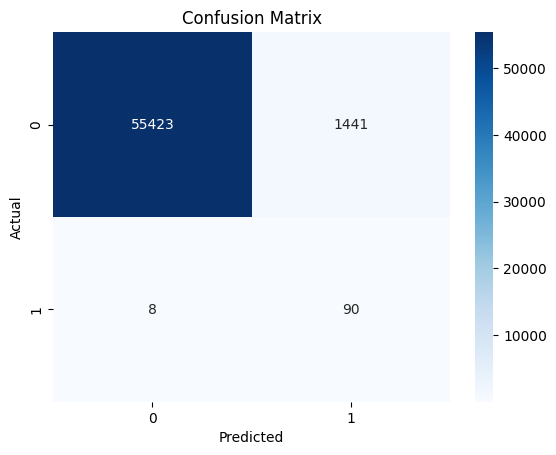

In [21]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Train Random Forest with balanced class weight
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
# Predict classes for the test data
y_pred_rf = rf.predict(X_test)
# Predicted probability
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [25]:
# Model evaluation results
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



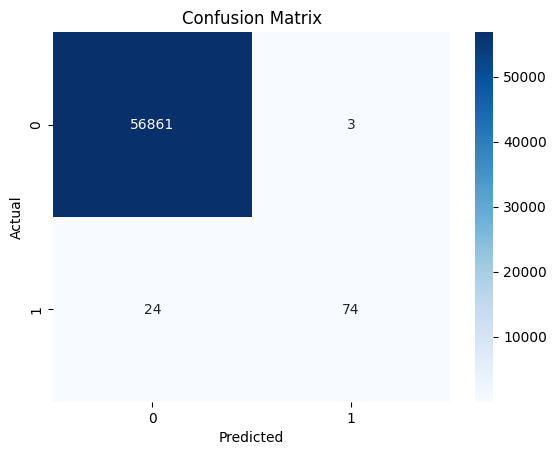

In [22]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Train the Support Vector Machine model with balanced class weight
svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [26]:
# Predict classes for the test data
y_pred_svm = svm.predict(X_test)
# Predicted probability
y_prob_svm = svm.predict_proba(X_test)[:, 1]

In [27]:
# Model evaluation results
print("Support Vector Machine Report")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.79      0.43        98

    accuracy                           1.00     56962
   macro avg       0.65      0.89      0.71     56962
weighted avg       1.00      1.00      1.00     56962



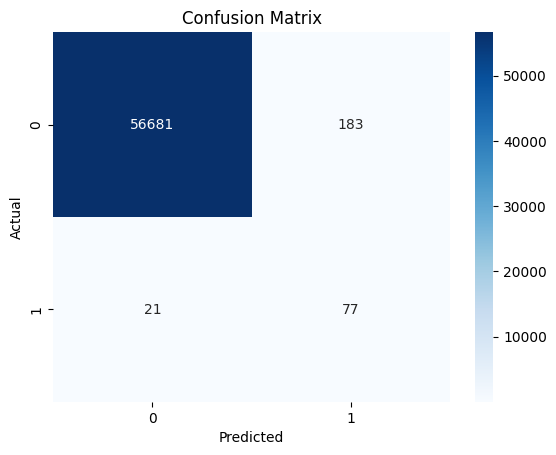

In [28]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Interactive prediction using random forest
def predict_custom_transaction(input_data):
    input_df = pd.DataFrame([input_data])
    input_df['Amount'] = scaler.transform(input_df[['Amount']])
    pred = rf.predict(input_df)[0]
    prob = rf.predict_proba(input_df)[0][1]
    print("Prediction:", "Fraud" if pred == 1 else "Not Fraud")
    print("Fraud Probability: {:.2f}%".format(prob * 100))

# Example usage
sample_input = dict(X_test.iloc[0])
predict_custom_transaction(sample_input)

Prediction: Not Fraud
Fraud Probability: 0.00%


The end